## Part 01: Loading data, visually inspecting and saving locally

### In this section you will:


*   Read in data from a file on the web.
*   Create a pandas dataframe to add rows and columns to the data.
*   Use Seaborn to plot the data to check it has loaded correctly.

### Before you begin:

*   Make sure you have set up an environment in either Google Colab, Anaconda or your preferred Python library.
*   Registered for Github and created your own fork
*   Link the fork to your colab or anaconda environment to 

### For help setting up your environment, please check Part 00

### Intro
As we start exploring currency returns, we are going to load the data from the repository, visually inspect it and save a copy locally for quick reference later.

Data is stored in a pickle file containing a dictionary, currency_returns, with three arrays:

**currency_returns.data:**  A TxN array of daily currency returns

**currency_returns.dates:** A Tx1 array of datetime arrays indicating the date associated with the rows of the return data

**currency_returns.names:** A 1xN array of currency codes indicating the currency assoicated with the columns of the return data

In [1]:
import cloudpickle as cp
import numpy as np, pandas as pd
from datetime import datetime, timedelta
import pickle
import urllib.request, urllib.parse, urllib.error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import autocorrelation_plot

In [2]:
currency_returns = cp.load(urllib.request.urlopen('https://github.com/fintechsteve/data/blob/master/currency_returns.pkl?raw=true'))
currency_returns

{'data': array([[-2.12900106e-03, -1.71206104e-03, -9.91521557e-03, ...,
         -3.29878880e-03,  5.36361955e-04, -4.70411991e-03],
        [-9.47180214e-04,  1.51742541e-05,  8.50026858e-03, ...,
          8.80088593e-03, -1.92421681e-03,  7.11298082e-03],
        [-1.15760422e-03,  6.67737395e-04, -1.02331388e-03, ...,
          2.75925552e-03, -1.12861462e-03,  9.23671454e-03],
        ...,
        [ 2.98895387e-03, -2.11656802e-03, -6.56698323e-04, ...,
          6.15875912e-03, -5.70084800e-04,  6.65421992e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.29567245e-04,  3.97450024e-03,  2.02101859e-04, ...,
          5.64571346e-04,  1.49732620e-03,  6.52682886e-04]]),
 'dates': array([datetime.datetime(1975, 1, 2, 0, 0),
        datetime.datetime(1975, 1, 3, 0, 0),
        datetime.datetime(1975, 1, 6, 0, 0), ...,
        datetime.datetime(2017, 12, 22, 0, 0),
        datetime.datetime

In [3]:
returns = pd.DataFrame(currency_returns['data'], columns=currency_returns['names'], index=currency_returns['dates'])
returns

,AUD,CAD,CHF,EUR,GBP,JPY,NOK,NZD,SEK
1975-01-02,-0.002129,-1.712061e-03,-0.009915,-0.003544,-0.005745,-0.001502,-0.003299,0.000536,-0.004704
1975-01-03,-0.000947,1.517425e-05,0.008500,0.007886,0.003424,0.002711,0.008801,-0.001924,0.007113
1975-01-06,-0.001158,6.677374e-04,-0.001023,0.008174,0.002346,-0.004728,0.002759,-0.001129,0.009237
1975-01-07,0.004193,-1.726304e-03,0.001702,0.002150,0.001702,0.002410,0.005434,0.004567,-0.001466
1975-01-08,-0.001489,-2.000930e-04,-0.015237,-0.008650,-0.001997,0.000122,-0.006315,-0.000034,-0.006188
1975-01-09,-0.000324,-3.120108e-03,0.000298,0.004764,0.000298,-0.000409,-0.000114,-0.001217,-0.000751
1975-01-10,0.000077,-1.283429e-03,0.001489,0.001489,0.001489,0.000075,0.006256,0.000311,0.001489
1975-01-13,0.000579,-3.152212e-07,0.001789,-0.001210,0.000127,-0.000578,0.000542,0.000969,-0.002488
1975-01-14,-0.000699,7.303998e-04,-0.005132,-0.006698,-0.001827,0.000291,-0.006558,-0.000762,-0.007795
1975-01-15,-0.000934,1.198868e-03,-0.002078,0.001797,-0.000426,-0.002542,-0.002276,-0.000594,0.000094


### Data Exploration
We plot data using matplotlib and seaborn

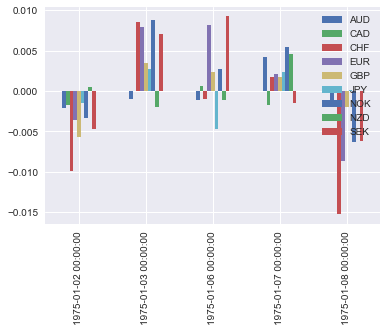

In [4]:
returns.head().plot(kind='bar')

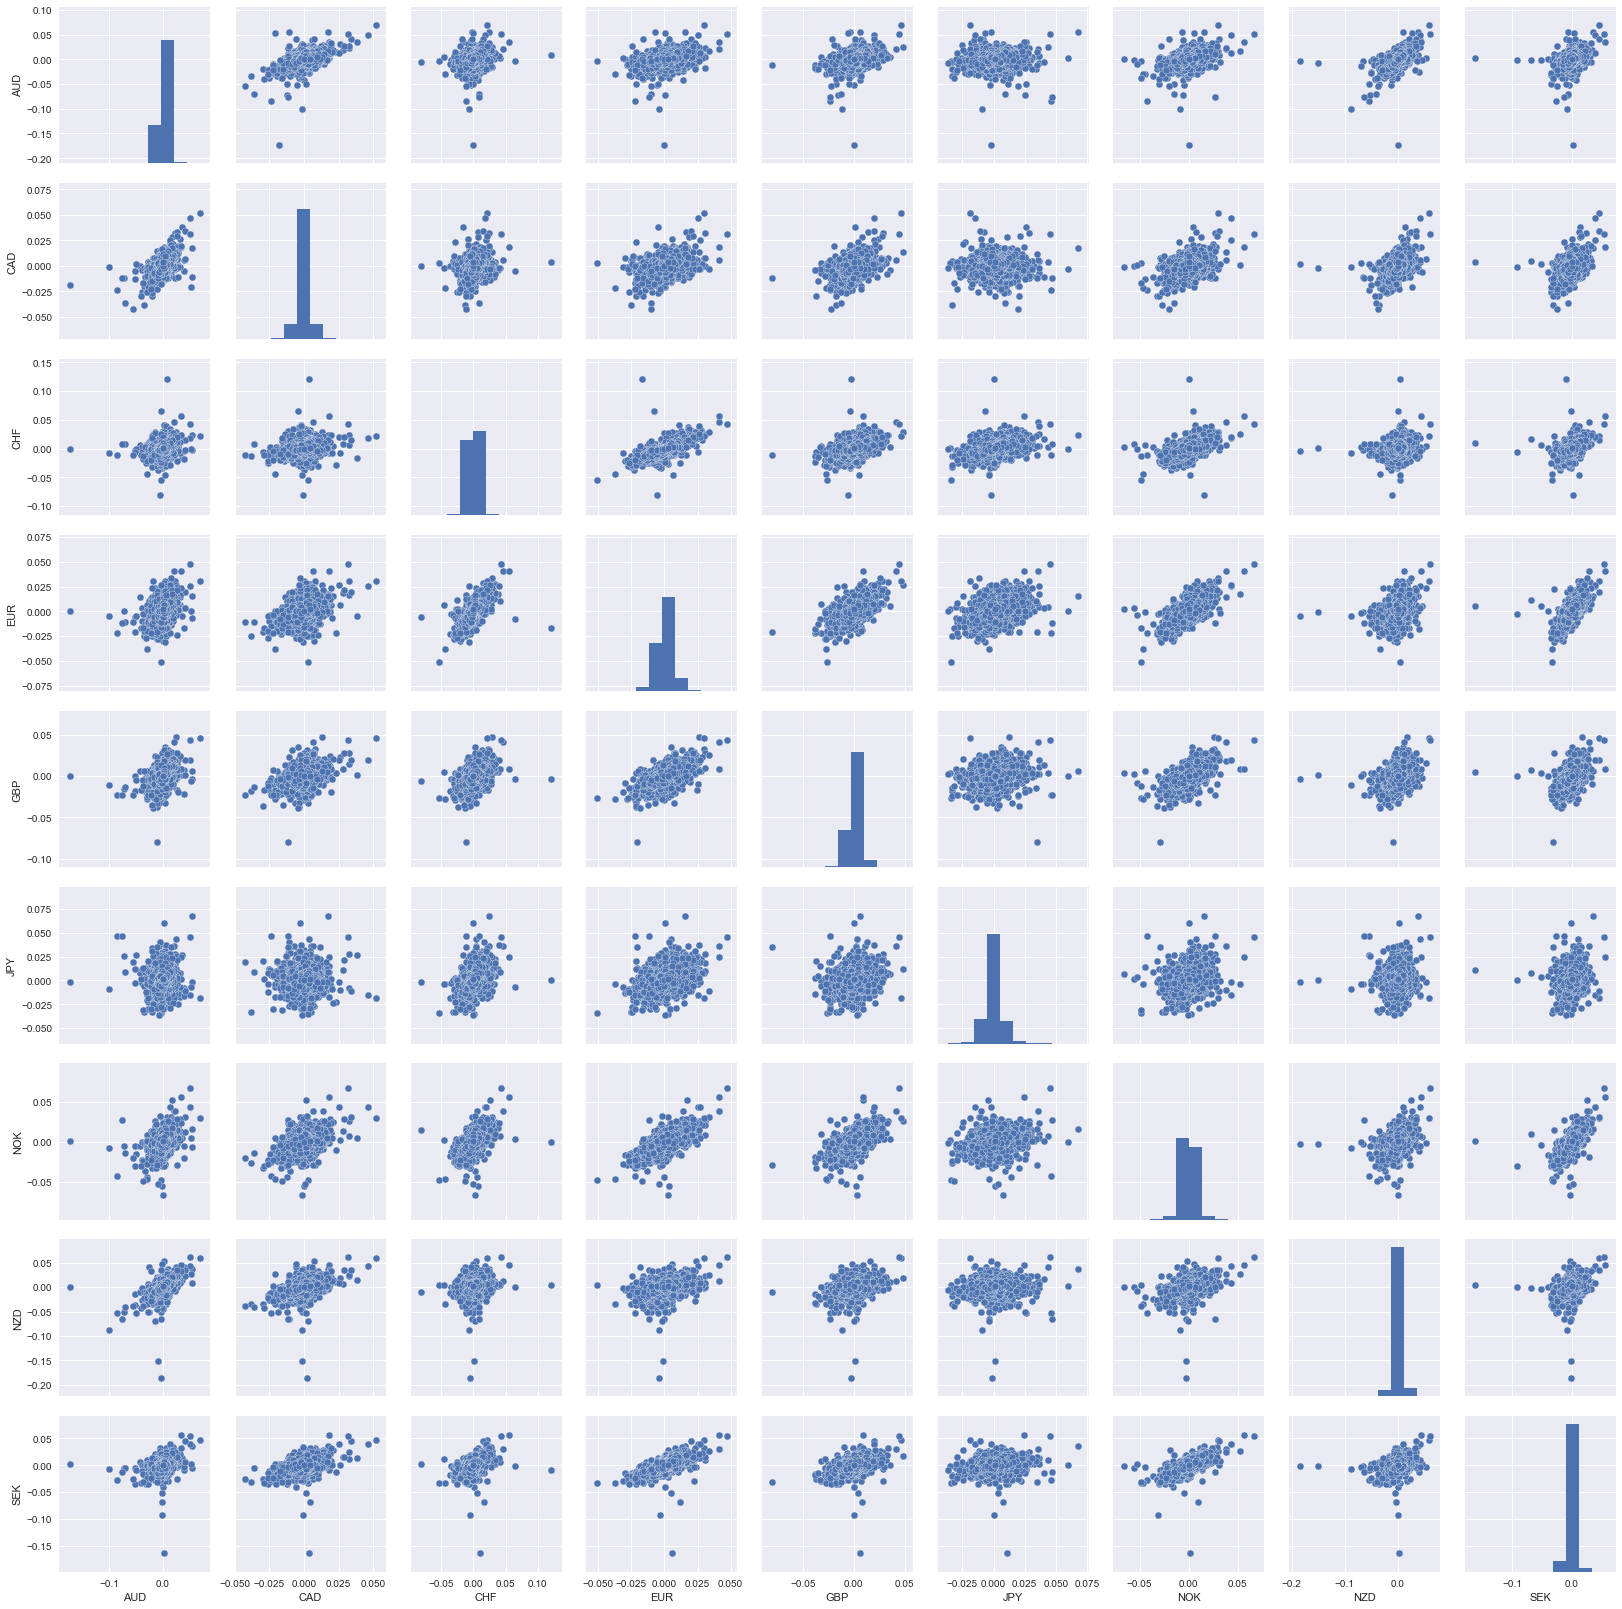

In [5]:
sns.pairplot(returns)

## Part 02 - Time-series properties of data and currency baskets. DXY
We calculate correlations and plot results

#### Step 1 - calculate correlation and plot heatmap

In [6]:
returns_corr = returns.corr()

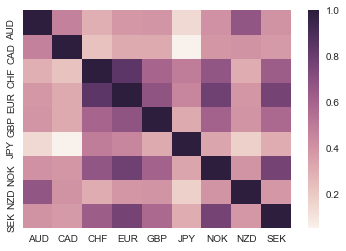

In [7]:
sns.heatmap(returns_corr)#, xticklabels=returns_corr.columns, yticklabels=returns_corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

#### Step 2 - calculate x^2

In [8]:
returns_squared = returns.join(returns.pow(2, axis=0), rsuffix='_squared')
returns

,AUD,CAD,CHF,EUR,GBP,JPY,NOK,NZD,SEK
1975-01-02,-0.002129,-1.712061e-03,-0.009915,-0.003544,-0.005745,-0.001502,-0.003299,0.000536,-0.004704
1975-01-03,-0.000947,1.517425e-05,0.008500,0.007886,0.003424,0.002711,0.008801,-0.001924,0.007113
1975-01-06,-0.001158,6.677374e-04,-0.001023,0.008174,0.002346,-0.004728,0.002759,-0.001129,0.009237
1975-01-07,0.004193,-1.726304e-03,0.001702,0.002150,0.001702,0.002410,0.005434,0.004567,-0.001466
1975-01-08,-0.001489,-2.000930e-04,-0.015237,-0.008650,-0.001997,0.000122,-0.006315,-0.000034,-0.006188
1975-01-09,-0.000324,-3.120108e-03,0.000298,0.004764,0.000298,-0.000409,-0.000114,-0.001217,-0.000751
1975-01-10,0.000077,-1.283429e-03,0.001489,0.001489,0.001489,0.000075,0.006256,0.000311,0.001489
1975-01-13,0.000579,-3.152212e-07,0.001789,-0.001210,0.000127,-0.000578,0.000542,0.000969,-0.002488
1975-01-14,-0.000699,7.303998e-04,-0.005132,-0.006698,-0.001827,0.000291,-0.006558,-0.000762,-0.007795
1975-01-15,-0.000934,1.198868e-03,-0.002078,0.001797,-0.000426,-0.002542,-0.002276,-0.000594,0.000094


#### Step 4 - calculate correlation coeff with x^2 and generate heatmap

In [9]:
returns_corr = returns_squared.corr()

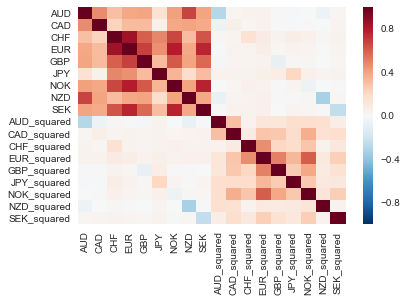

In [10]:
sns.heatmap(returns_corr)

#### Step 5 - calculate autocorrelation with lag n=1
Using tips from this stackoverflow post: https://stackoverflow.com/questions/26083293/calculating-autocorrelation-of-pandas-dataframe-along-each-column

In [11]:
def df_autocorr(df, lag=1, axis=0):
    """Compute full-sample column-wise autocorrelation for a DataFrame."""
    return df.apply(lambda col: col.autocorr(lag), axis=axis)

def df_rolling_autocorr(df, window, lag=1):
    """Compute rolling column-wise autocorrelation for a DataFrame."""

    return (df.rolling(window=window)
        .corr(df.shift(lag))) # could .dropna() here

returns_autocorr = df_autocorr(returns_squared, lag=1)

#### Step 6 - Plot autocorrelation with delay n=1

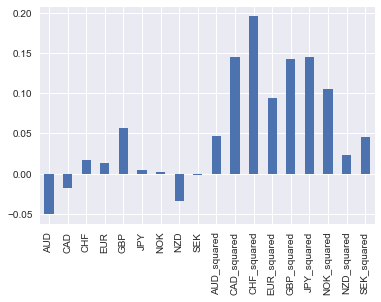

In [12]:
# autocorrelation_plot(returns)
# plt.show()
returns_autocorr.plot(kind='bar')

#### Step 7 - Calculate DXY index (which is calculated by taking a weighted average of currencies with weights:
Euro (EUR), 57.6% weight
Japanese yen (JPY) 13.6% weight
Pound sterling (GBP), 11.9% weight
Canadian dollar (CAD), 9.1% weight
Swedish krona (SEK), 4.2% weight
Swiss franc (CHF) 3.6% weight


In [17]:
dxy_weight = [0, 0.119, 0.036, 0, 0.136, 0.576, 0, 0, 0.091]
dxy = returns.dot(dxy_weight)
# print(dxy)
returns['DXY'] = dxy.copy()
print(returns.head())

ValueError: Dot product shape mismatch, (11214, 10) vs (9,)